# Introduction to the Character Analysis of ***The Umbrella Academy***

In this notebook we will extract character names from the text data. To do this we will count the mentions or discussions of each character in the text data.

## Season 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Umbrella Academy/Data/season1_clean.csv')


We will define a mapping dictionary `character_aliases` where each key is the "official" character name, and the associated value is a list of aliases or variations that refer to the same character.

**Note: We will use both the character names and real names of the actors. Viewers sometimes use real names instead of character names in their movie reviews.**

In [ ]:
# Define a mapping dictionary for character variations
character_aliases = {
    "Luther": ["Luther", "Number One","Tom Hopper", "Tom"],
    "Diego": ["Diego", "Number Two", "DAVID CASTAÑEDA","DAVID CASTANEDA","DAVID","CASTAÑEDA","CASTANEDA"],
    "Allison": ["Allison", "Number Three","Alison", "EMMY RAVER-LAMPMAN","EMMY"],
    "Klaus": ["Klaus", "Number Four","Claus","ROBERT SHEEHAN","ROBERT","SHEEHAN"],
    "Number Five": ["Number Five", "The Boy","Five","AIDAN GALLAGHER","AIDAN"],
    "Ben": ["Ben", "Number Six","JUSTIN"],
    "Vanya": ["Vanya", "Number Seven", "The White Violin","Ellen Page","Ellen","Page"],
    "Sir Reginald Hargreeves": ["Sir Reginald Hargreeves", "Hargreeves", "Dad","COLM FEORE","COLM","FEORE"]
}

We will initialize a dictionary `character_mentions` to store the mention counts for each "official" character name, using the keys from character_aliases.

In [ ]:
# Initialize a dictionary to store character mention counts
character_mentions = {name: 0 for name in character_aliases.keys()}

We will iterate through each comment in the 'body' column, and for each character, we will check if any of the aliases associated with that character appear in the comment text. If an alias is found (case-insensitive), we will increment the corresponding count in the `character_mentions` dictionary.


This approach will allow us to account for variations in character names and count mentions of each character, even when they are referred to by different names or aliases.

In [ ]:
# Iterating through the 'body' column of the DataFrame and count character mentions
for text in df['body']:
    for character, aliases in character_aliases.items():
        for alias in aliases:
            if alias.lower() in text.lower():  # Case-insensitive matching
                character_mentions[character] += 1
                break  # Break out of the alias loop once a mention is found

In [ ]:
# Print character mention counts
for character, count in sorted(character_mentions.items(), key=lambda item: item[1], reverse=True):
    print(f"{character}: {count} mentions")

Vanya: 239 mentions
Luther: 148 mentions
Klaus: 139 mentions
Allison: 110 mentions
Number Five: 77 mentions
Ben: 74 mentions
Diego: 63 mentions
Sir Reginald Hargreeves: 48 mentions


In [ ]:
# Lets create a dataframe for easy visualisation

# Sort the mention_counts in descending order
sorted_mention_counts = sorted(character_mentions.items(), key=lambda item: item[1], reverse=True)

# Create a DataFrame from the sorted mention counts
df_viz = pd.DataFrame(sorted_mention_counts, columns=['Character', 'Mention Count'])

# Display the DataFrame
df_viz

,Character,Mention Count
0,Vanya,239
1,Luther,148
2,Klaus,139
3,Allison,110
4,Number Five,77
5,Ben,74
6,Diego,63
7,Sir Reginald Hargreeves,48


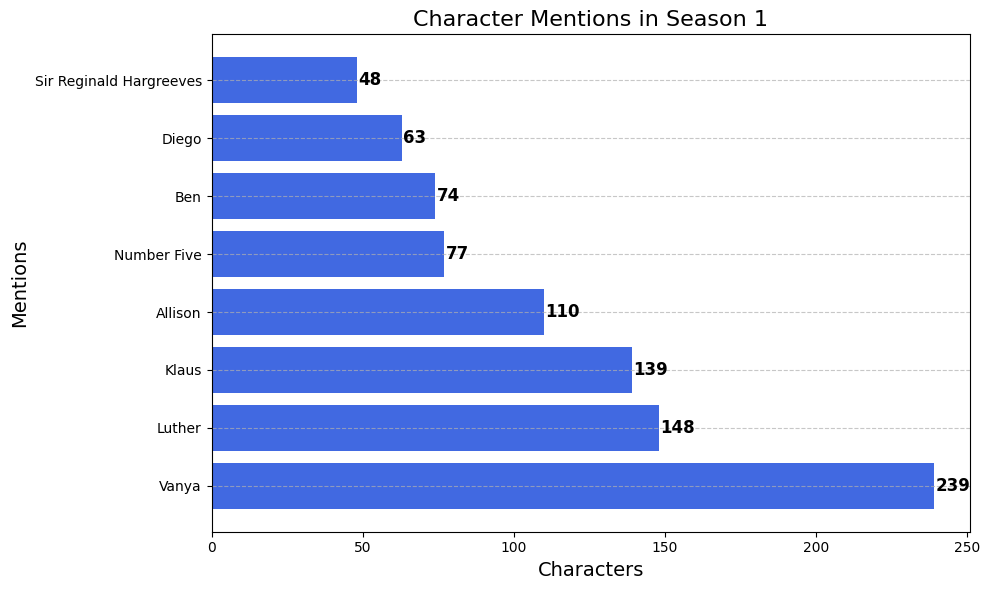

In [ ]:
df_viz = df_viz.sort_values(by='Mention Count', ascending=False)

# Set the bar color to blue
bar_color = 'royalblue'

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_viz['Character'], df_viz['Mention Count'], color=bar_color)

# Add labels to the bars
for i, v in enumerate(df_viz['Mention Count']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=12, fontweight='bold', color='black')

# Customize the chart
plt.xlabel('Characters', fontsize=14)
plt.ylabel('Mentions', fontsize=14)
plt.title('Character Mentions in Season 1', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the chart
plt.tight_layout()
plt.show()

# Season 2 & 3

Initially, we did not include a function in the previous code to provide a clear and detailed explanation of the code's functionality. However, to improve efficiency and reusability for future analyses, it makes sense to encapsulate this code within a function. This will allow us to easily apply the same character mention counting logic to multiple seasons.

In [ ]:
def count_character_mentions(dataframe, character_aliases, column_name):
    # Initialize a dictionary to store character mention counts
    character_mentions = {name: 0 for name in character_aliases.keys()}

    # Iterate through the specified column and count character mentions
    for text in dataframe[column_name]:
        for character, aliases in character_aliases.items():
            for alias in aliases:
                if alias.lower() in text.lower():  # Case-insensitive matching
                    character_mentions[character] += 1
                    break  # Break out of the alias loop once a mention is found

    return character_mentions

### Season 2

**Note: You may notice additional characters in the mapping for Seasons 2 and 3, as I have accounted for the new characters introduced in each season.**

In [ ]:
# import dataset for season 2
df2 = pd.read_csv("/content/drive/MyDrive/Umbrella Academy/Data/season2_clean.csv")

In [ ]:
# Define a mapping dictionary for character variations
character_aliases = {
    "Luther": ["Luther", "Number One","Tom Hopper", "Tom"],
    "Diego": ["Diego", "Number Two", "DAVID CASTAÑEDA","DAVID CASTANEDA","DAVID","CASTAÑEDA","CASTANEDA"],
    "Allison": ["Allison", "Number Three","Alison", "EMMY RAVER-LAMPMAN","EMMY"],
    "Klaus": ["Klaus", "Number Four","Claus","ROBERT SHEEHAN","ROBERT","SHEEHAN"],
    "Number Five": ["Number Five", "The Boy","Five","AIDAN GALLAGHER","AIDAN"],
    "Ben": ["Ben", "Number Six","JUSTIN"],
    "Vanya": ["Vanya", "Number Seven", "The White Violin","Ellen Page","Ellen","Page"],
    "Sir Reginald Hargreeves": ["Sir Reginald Hargreeves", "Hargreeves", "Dad","COLM FEORE","COLM","FEORE"],
    "Lila": ["Lila","RITU ARYA","RITU","ARYA"],
    "The Handler": ["The Handler","Handler","Handle"],
    "Harlan":["Harlan"],
    "Sissy":["Sissy","Sissy Cooper"]
}

In [ ]:
mention_counts = count_character_mentions(df2, character_aliases, 'body')

# Print character mention counts in descending order
for character, count in sorted(mention_counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{character}: {count} mentions")


Vanya: 209 mentions
Diego: 175 mentions
Klaus: 142 mentions
Number Five: 133 mentions
Ben: 132 mentions
Luther: 130 mentions
Allison: 117 mentions
Sir Reginald Hargreeves: 71 mentions
Lila: 60 mentions
The Handler: 57 mentions
Harlan: 39 mentions
Sissy: 37 mentions


In [ ]:
# Lets create a dataframe for easy visualisation

# Sort the mention_counts in descending order
sorted_mention_counts = sorted(mention_counts.items(), key=lambda item: item[1], reverse=True)

# Create a DataFrame from the sorted mention counts
df2_viz = pd.DataFrame(sorted_mention_counts, columns=['Character', 'Mention Count'])

# Display the DataFrame
df2_viz

,Character,Mention Count
0,Vanya,209
1,Diego,175
2,Klaus,142
3,Number Five,133
4,Ben,132
5,Luther,130
6,Allison,117
7,Sir Reginald Hargreeves,71
8,Lila,60
9,The Handler,57


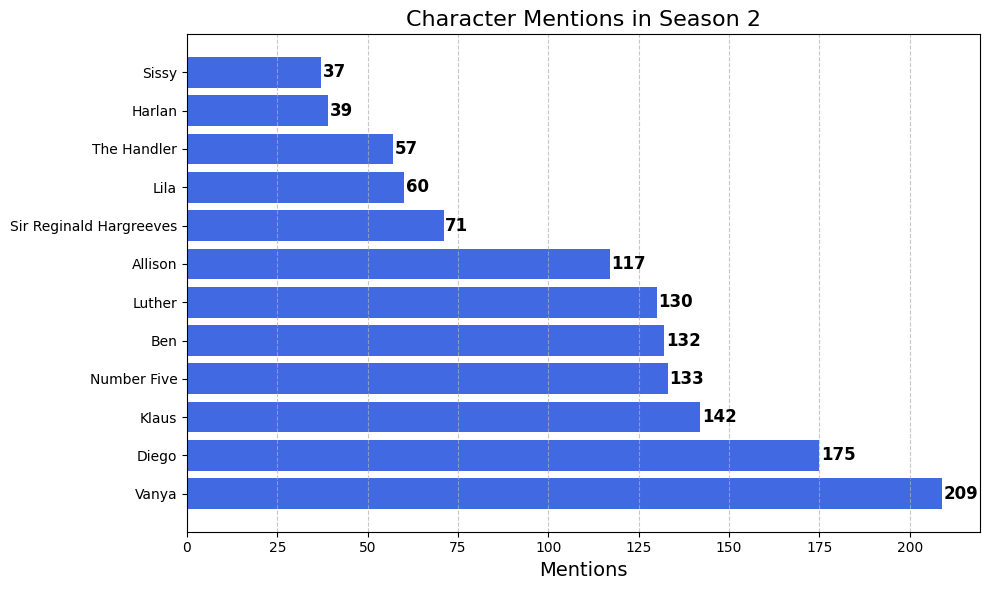

In [ ]:
# Set the bar color to blue
bar_color = 'royalblue'

# horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df2_viz['Character'], df2_viz['Mention Count'], color=bar_color)

# Add labels to the bars
for i, v in enumerate(df2_viz['Mention Count']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=12, fontweight='bold', color='black')

# Customize the chart
plt.xlabel('Mentions', fontsize=14)
plt.title('Character Mentions in Season 2', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# display the chart
plt.tight_layout()
plt.show()

### Season 3

In [ ]:
# import dataset for season 3
df3 = pd.read_csv("/content/drive/MyDrive/Umbrella Academy/Data/season3_clean.csv")

In [ ]:
# Define a mapping dictionary for character variations
character_aliases = {
    "Luther": ["Luther", "Number One","Tom Hopper", "Tom"],
    "Diego": ["Diego", "Number Two", "DAVID CASTAÑEDA","DAVID CASTANEDA","DAVID","CASTAÑEDA","CASTANEDA"],
    "Allison": ["Allison", "Number Three","Alison", "EMMY RAVER-LAMPMAN","EMMY"],
    "Klaus": ["Klaus", "Number Four","Claus","ROBERT SHEEHAN","ROBERT","SHEEHAN"],
    "Number Five": ["Number Five", "The Boy","Five","AIDAN GALLAGHER","AIDAN"],
    "Ben": ["Ben", "Number Six","JUSTIN"],
    "Vanya": ["Vanya", "Number Seven", "The White Violin","Ellen Page","Ellen","Page","Elliot Page","Elliot","Eliot"],
    "Sir Reginald Hargreeves": ["Sir Reginald Hargreeves", "Hargreeves", "Dad","COLM FEORE","COLM","FEORE"],
    "Lila": ["Lila","RITU ARYA","RITU","ARYA"],
    "The Handler": ["The Handler","Handler","Handle"],
    "Harlan":["Harlan"],
    "Sissy":["Sissy","Sissy Cooper"],
    "Marcus":["Marcus","Marcus Hargreeves","JUSTIN CORNWELL","Justin","Cornwell"],
    "Fei":["Fei Hargreeves","Fei"],
    "Alphonso":["Alphonso Hargreeves","Alphonso"],
    "Sloane":["Sloane Hargreeves","Sloane"],
    "Jayme":["Jayme Hargreeves","Jayme","Jamie"]
}

In [ ]:
mention_counts = count_character_mentions(df3, character_aliases, 'body')

# Print character mention counts in descending order
for character, count in sorted(mention_counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{character}: {count} mentions")

Allison: 633 mentions
Luther: 275 mentions
Ben: 238 mentions
Klaus: 209 mentions
Number Five: 141 mentions
Sloane: 121 mentions
Harlan: 96 mentions
Sir Reginald Hargreeves: 95 mentions
Diego: 93 mentions
Vanya: 69 mentions
Lila: 58 mentions
Marcus: 32 mentions
The Handler: 22 mentions
Fei: 20 mentions
Alphonso: 14 mentions
Jayme: 9 mentions
Sissy: 7 mentions


In [ ]:
# Lets create a dataframe for easy visualisation

# Sort the mention_counts in descending order
sorted_mention_counts = sorted(mention_counts.items(), key=lambda item: item[1], reverse=True)

# Create a DataFrame from the sorted mention counts
df3_viz = pd.DataFrame(sorted_mention_counts, columns=['Character', 'Mention Count'])

# Display the DataFrame
df3_viz

,Character,Mention Count
0,Allison,633
1,Luther,275
2,Ben,238
3,Klaus,209
4,Number Five,141
5,Sloane,121
6,Harlan,96
7,Sir Reginald Hargreeves,95
8,Diego,93
9,Vanya,69


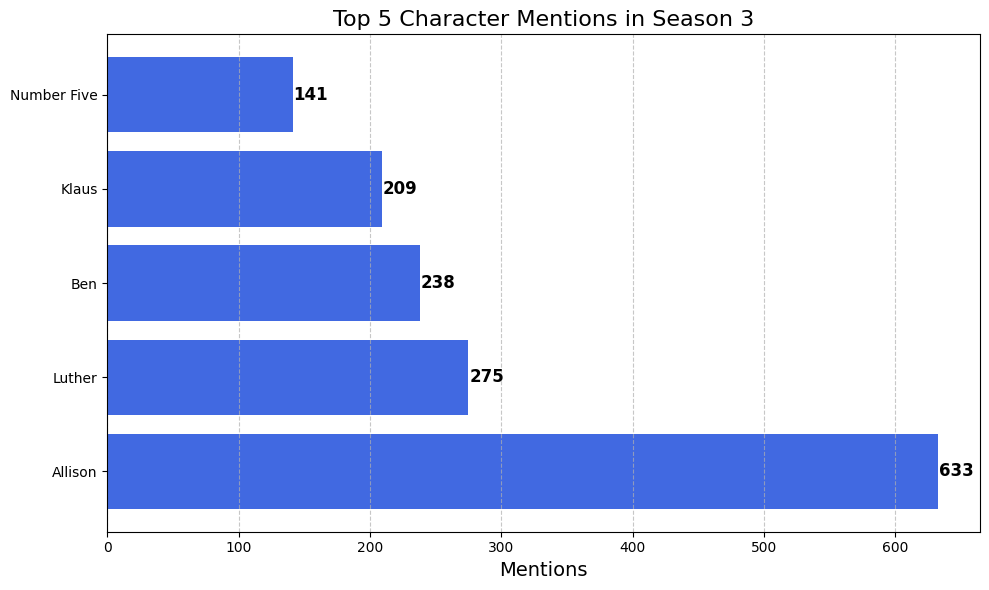

In [ ]:
# Sort the DataFrame in descending order by 'Mention Count'
df3_viz = df3_viz.sort_values(by='Mention Count', ascending=False)

# Select only the top 5 rows
df3_viz_top5 = df3_viz.head(5)

# Set the bar color to blue
bar_color = 'royalblue'

# Create the horizontal bar chart for the top 5 characters
plt.figure(figsize=(10, 6))
plt.barh(df3_viz_top5['Character'], df3_viz_top5['Mention Count'], color=bar_color)

# Add count labels to the bars
for i, v in enumerate(df3_viz_top5['Mention Count']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=12, fontweight='bold', color='black')

# Customize the chart
plt.xlabel('Mentions', fontsize=14)
plt.title('Top 5 Character Mentions in Season 3', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

### Merging the datasets and observing the most mentioned character overall

In [ ]:
# concatenate the daatframes
concat_df = pd.concat([df,df2,df3], axis=0)

In [ ]:
mention_counts = count_character_mentions(concat_df, character_aliases, 'body')

# Print character mention counts in descending order
for character, count in sorted(mention_counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{character}: {count}")

Allison: 860
Luther: 553
Vanya: 534
Klaus: 490
Ben: 444
Number Five: 351
Diego: 331
Sir Reginald Hargreeves: 214
Harlan: 135
Sloane: 121
Lila: 118
The Handler: 98
Sissy: 44
Marcus: 32
Fei: 21
Alphonso: 14
Jayme: 9


In [ ]:
# Lets create a dataframe for easy visualisation

# Sort the mention_counts in descending order
sorted_mention_counts = sorted(mention_counts.items(), key=lambda item: item[1], reverse=True)

# Create a DataFrame from the sorted mention counts
concat_df_viz = pd.DataFrame(sorted_mention_counts, columns=['Character', 'Mention Count'])

# Display the DataFrame
concat_df_viz

,Character,Mention Count
0,Allison,860
1,Luther,553
2,Vanya,534
3,Klaus,490
4,Ben,444
5,Number Five,351
6,Diego,331
7,Sir Reginald Hargreeves,214
8,Harlan,135
9,Sloane,121


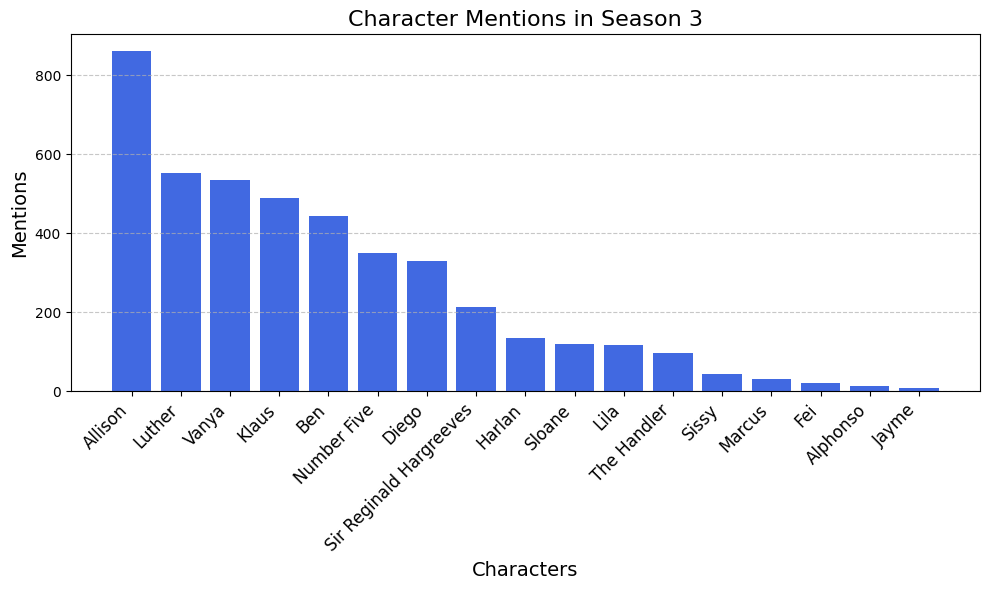

In [ ]:
import matplotlib.pyplot as plt

# Set the bar color to blue
bar_color = 'royalblue'

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(concat_df_viz['Character'], concat_df_viz['Mention Count'], color=bar_color)

# Customize the chart
plt.xlabel('Characters', fontsize=14)
plt.ylabel('Mentions', fontsize=14)
plt.title('Character Mentions in Season 3', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

Lets download the dataframes to csv for use in dashboard report

In [ ]:
# to cvs file
df_viz.to_csv('season1_count.csv', index=False)
df2_viz.to_csv('season2_count.csv', index=False)
df3_viz.to_csv('season3_count.csv', index=False)
concat_df_viz.to_csv('umbrella_count.csv', index=False)